https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data

# Importing Libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

# Loading the Dataset:

In [2]:
# Loading the Data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA:

In [3]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
def explore_data(data):
    """
    Explores the dataset by displaying major moments, and basic statistics.

    Parameters:
        data (DataFrame): Input dataset.

    Returns:
        None
    """
    # Display major moments
    moments = pd.DataFrame({
        'Mean': data.mean(),
        'Median': data.median(),
        'Standard Deviation': data.std(),
        'Skewness': data.skew(),
        'Kurtosis': data.kurtosis()
    })
    print("Major Moments:")
    print(moments)
    print("\n")

explore_data(df)

Major Moments:
                Mean  Median  Standard Deviation  Skewness  Kurtosis
age        54.366337    55.0            9.082101 -0.202463 -0.542167
sex         0.683168     1.0            0.466011 -0.791335 -1.382961
cp          0.966997     1.0            1.032052  0.484732 -1.193071
trtbps    131.623762   130.0           17.538143  0.713768  0.929054
chol      246.264026   240.0           51.830751  1.143401  4.505423
fbs         0.148515     0.0            0.356198  1.986652  1.959678
restecg     0.528053     1.0            0.525860  0.162522 -1.362673
thalachh  149.646865   153.0           22.905161 -0.537410 -0.061970
exng        0.326733     0.0            0.469794  0.742532 -1.458317
oldpeak     1.039604     0.8            1.161075  1.269720  1.575813
slp         1.399340     1.0            0.616226 -0.508316 -0.627521
caa         0.729373     0.0            1.022606  1.310422  0.839253
thall       2.313531     2.0            0.612277 -0.476722  0.297915
output      0.54455

Across various features such as age, cholesterol levels (chol), and maximum heart rate achieved (thalachh), notable observations emerge. For instance, while the mean age stands at 54.37 years, the distribution exhibits a slightly right-skewed pattern, indicating a tendency towards higher ages. Additionally, features like cholesterol levels (chol) display higher variability, as indicated by the considerable standard deviation of 51.83, suggesting potential diversity in health profiles within the dataset.

In [5]:
print(f'Shape     : {df.shape}\n'
      f'Size      : {df.size}\n' 
      f'Dimension : {df.ndim}')

Shape     : (303, 14)
Size      : 4242
Dimension : 2


In [6]:
# Checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

This indicates that the dataset is complete and does not require any imputation or handling of missing values.

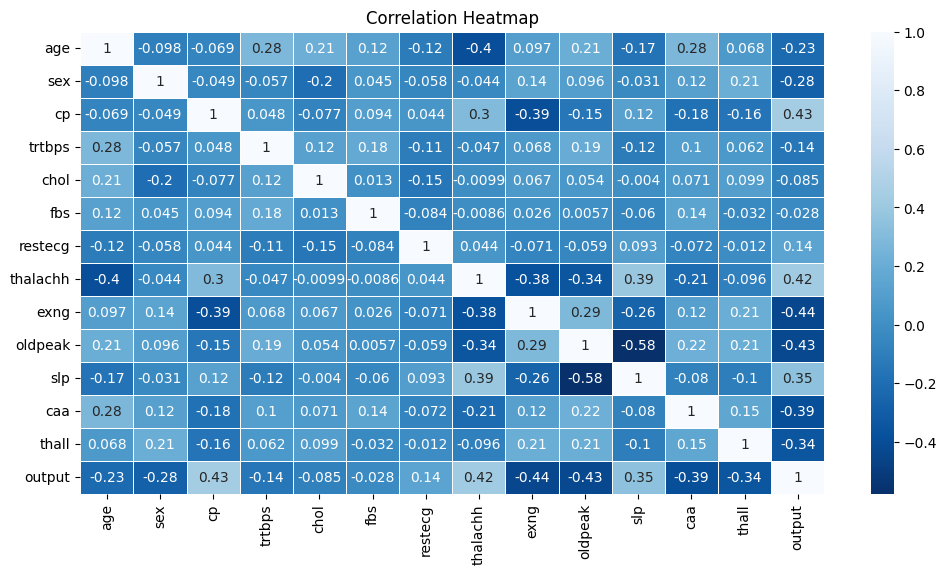

In [7]:
def plot_heatmap(data):
    """
    Plots a heatmap to visualize the correlation matrix of the input dataset.
    
    This function computes the correlation matrix of the input dataset and plots it as a heatmap.
    Each cell in the heatmap represents the correlation coefficient between two features.
    The correlation coefficient ranges from -1 to 1, where:
        - 1 indicates a perfect positive correlation,
        - -1 indicates a perfect negative correlation, and
        - 0 indicates no correlation between the features.
    
    Parameters:
        data (DataFrame): Input dataset.
            The dataset for which the correlation matrix will be computed and visualized.
    
    Returns:
        None
    """
    correlation_matrix = data.corr()
    plt.figure(figsize=(12, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues_r', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()
plot_heatmap(df)

Notable correlations include a relatively strong negative correlation between age and maximum heart rate achieved (thalachh), indicating that older individuals tend to have lower maximum heart rates. Additionally, there is a positive correlation between chest pain type (cp) and the presence of heart disease (output), suggesting that certain types of chest pain may be associated with a higher likelihood of heart disease.

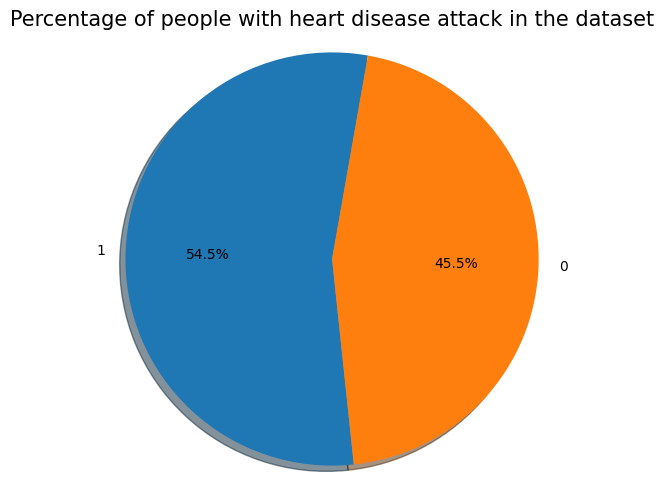

In [8]:
def plot_heart_disease_pie_chart(df):
    """
    Plot a pie chart showing the percentage of people with heart disease attack in the dataset.

    Parameters:
    - df (DataFrame): Input dataframe containing the 'output' column indicating heart disease attack.

    Returns:
    - None: Displays the pie chart.
    """
    heart = Counter(df['output'])
    classes = []
    count = []   # list to store number of labels of each class
    for i in heart.keys():
        classes.append(i)
        count.append(heart[i])

    plt.pie(
        count,
        labels=classes,
        shadow=True,
        startangle=80,
        autopct='%1.1f%%'
    )
    plt.axis('equal')
    plt.tight_layout()
    plt.title("Percentage of people with heart disease attack in the dataset", fontsize=15)

plot_heart_disease_pie_chart(df)

It indicates that there is a relatively balanced representation between individuals with and without heart disease, with approximately half of the dataset comprising people with heart disease (54.5%) and the other half without (45.6%).


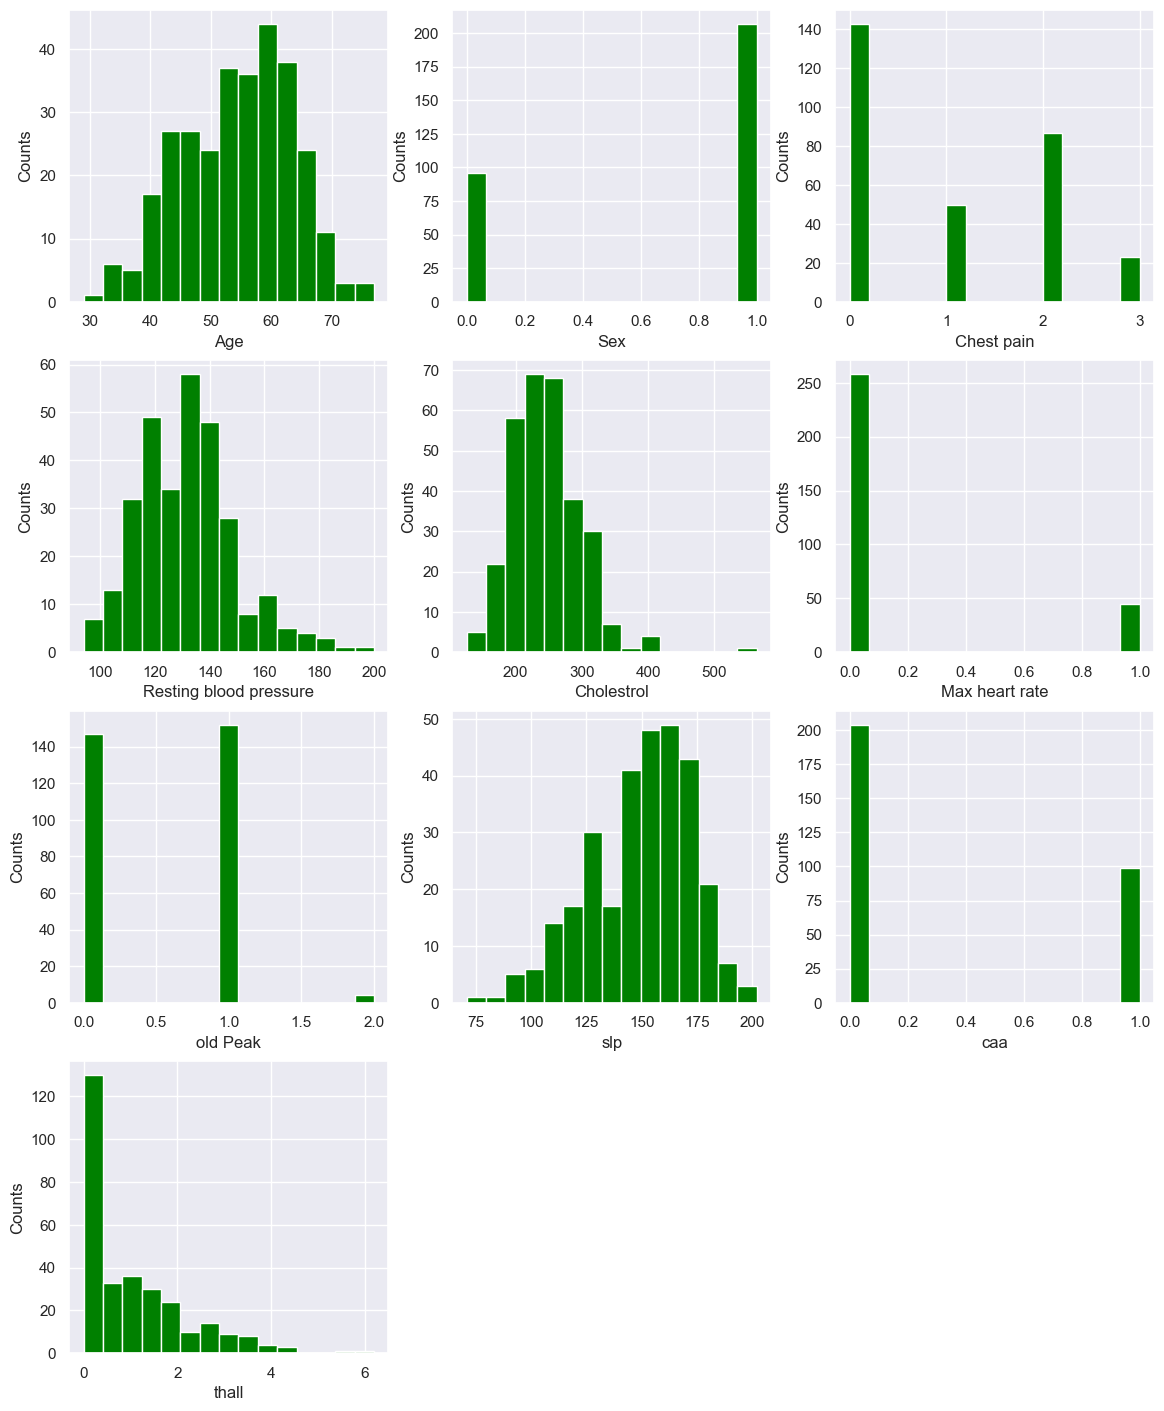

In [9]:
def plot_histograms(df):
    """
    Plot histograms for each numerical feature in the dataframe.

    Parameters:
    - df (DataFrame): Input dataframe.

    Returns:
    - None: Displays the histograms.
    """
    sns.set()
    lst = ["Age","Sex","Chest pain","Resting blood pressure","Cholestrol","Max heart rate","old Peak","slp","caa","thall"]
    lst1 = list(df.columns)
    plt.figure(figsize=(14, 22))
    for i in range(0, len(lst)):
        plt.subplot(5, 3, i+1)
        plt.hist(df[lst1[i]], bins=15, color="green")
        plt.xlabel(lst[i])
        plt.ylabel("Counts")
    plt.show()
plot_histograms(df)

Age distribution appears relatively normal, with a diverse range of ages represented. Gender distribution seems balanced. Most individuals report chest pain type 0. Resting blood pressure and cholesterol levels vary across the dataset, indicating diverse health profiles. Maximum heart rate achieved shows a tendency towards higher values. Old peak values are right-skewed, suggesting a prevalence of lower values. Other variables like slp, caa, and thall exhibit varied distributions. 

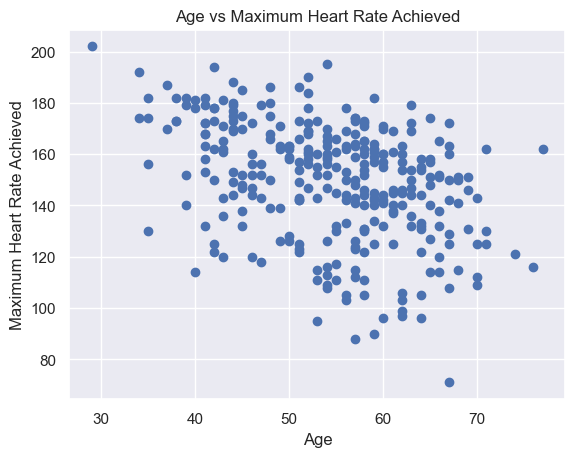

In [10]:
def plot_age_vs_max_heart_rate(df):
    """
    Plot a scatter plot of age versus maximum heart rate achieved.

    Parameters:
        df (DataFrame): Input dataframe containing 'age' and 'thalachh' columns.

    Returns:
        None: Displays the scatter plot.
    """
    plt.scatter(df['age'], df['thalachh'])
    plt.title('Age vs Maximum Heart Rate Achieved')
    plt.xlabel('Age')
    plt.ylabel('Maximum Heart Rate Achieved')
    plt.show()
plot_age_vs_max_heart_rate(df)

It appears that there is a negative correlation between age and maximum heart rate, as older individuals tend to have lower maximum heart rates. However, there is some variability in the data, suggesting that age alone may not be the sole determinant of maximum heart rate.

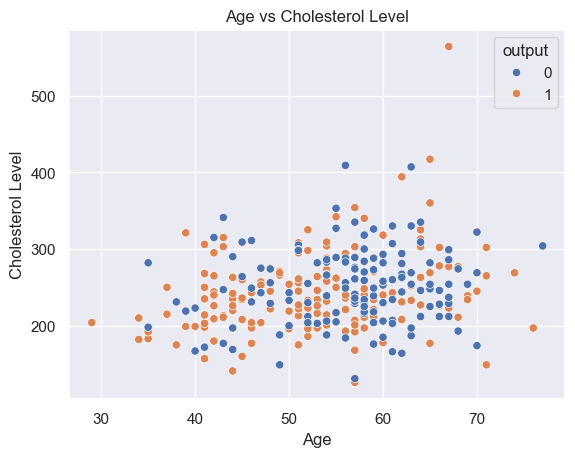

In [11]:
def plot_age_vs_cholesterol(df):
    """
    Plot a scatter plot of age against cholesterol level with hue indicating the presence or absence of heart disease.

    Parameters:
    - df (DataFrame): Input dataframe containing 'age', 'chol', and 'output' columns.

    Returns:
    - None: Displays the scatter plot.
    """
    sns.scatterplot(x='age', y='chol', hue='output', data=df)
    plt.title('Age vs Cholesterol Level')
    plt.xlabel('Age')
    plt.ylabel('Cholesterol Level')
    plt.show()

plot_age_vs_cholesterol(df)

It appears that there's no clear pattern indicating a direct association between age and cholesterol level with the presence of heart disease. However, there seem to be clusters of individuals with higher cholesterol levels across different age groups, particularly those with heart disease.

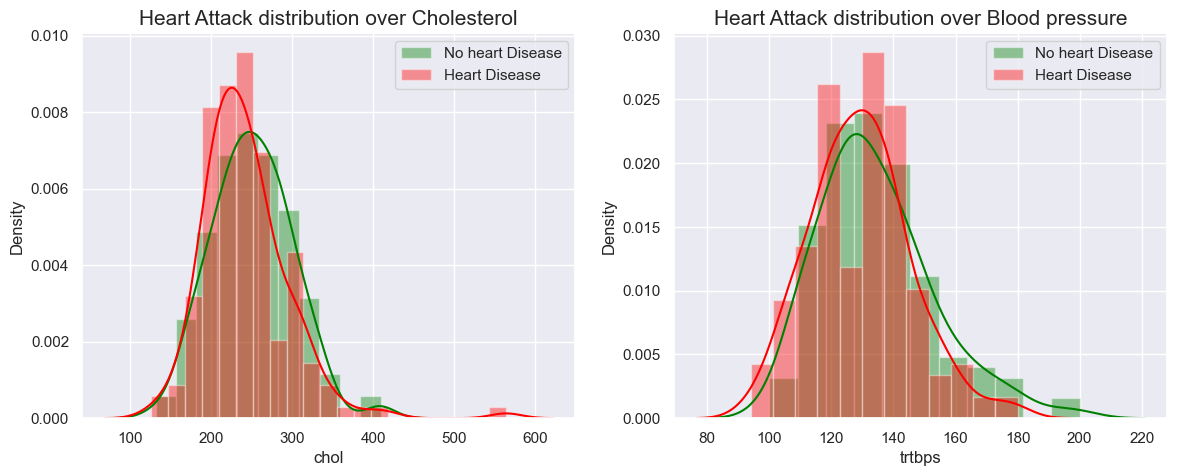

In [12]:
def plot_distribution_over_features(df):
    """
    Plot the distribution of features for individuals with and without heart disease.

    Parameters:
    - df (DataFrame): Input dataframe containing features and target labels.

    Returns:
    - None: Displays the distribution plots.
    """
    fig = plt.figure(figsize=(14, 5))
    
    # Plot distribution over Cholesterol
    ax1 = plt.subplot(121)
    sns.distplot(df[df['output'] == 0]["chol"], color='green', label='No heart Disease')
    sns.distplot(df[df['output'] == 1]["chol"], color='red', label='Heart Disease')
    plt.title('Heart Attack distribution over Cholesterol', fontsize=15)
    plt.legend()

    # Plot distribution over Blood pressure
    ax2 = plt.subplot(122)
    sns.distplot(df[df['output'] == 0]["trtbps"], color='green', label='No heart Disease')
    sns.distplot(df[df['output'] == 1]["trtbps"], color='red', label='Heart Disease')
    plt.title('Heart Attack distribution over Blood pressure', fontsize=15)
    plt.legend()

    plt.show()

plot_distribution_over_features(df)

The analysis suggests that individuals with cholesterol levels ranging from 120 to 250 and blood pressure between 110 to 140 are more likely to experience a heart attack. This conclusion is drawn from the distribution plots, where the density of individuals with heart disease is higher within these ranges compared to those without heart disease. Therefore, monitoring cholesterol levels and blood pressure within these ranges may be crucial for identifying individuals at higher risk of heart attacks and taking preventive measures accordingly.


# Data Preprocessing:

In [13]:
categorical_columns = ['sex','cp','restecg','slp','thall']
numerical_columns = ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa']

In [14]:
# Split data
X = df.drop('output', axis=1)
y = df['output']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# fit and transform training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [15]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate the performance of a machine learning model on training and test sets.

    Parameters:
    - model: Fitted machine learning model.
    - X_train: Input features for training.
    - y_train: Target labels for training.
    - X_test: Input features for testing.
    - y_test: Target labels for testing.

    Returns:
    - train_acc (float): Accuracy of the model on the training set.
    - test_acc (float): Accuracy of the model on the test set.
    - test_preds (array-like): Predicted labels on the test set.
    """
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    return train_acc, test_acc, test_preds

In [16]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Plot a confusion matrix.

    Parameters:
    - cm (array-like): Confusion matrix array.
    - classes (list): List of class labels.
    - normalize (bool): Whether to normalize the confusion matrix. Default is False.
    - title (str): Title for the plot. Default is 'Confusion matrix'.
    - cmap (colormap): Colormap for the plot. Default is plt.cm.Blues.

    Returns:
    - None
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

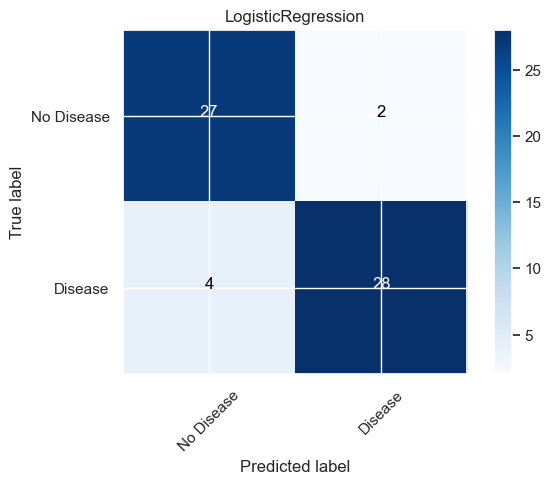

In [17]:
model = LogisticRegression()

train_acc, test_acc, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['No Disease', 'Disease'], title=model.__class__.__name__)
plt.show()

In [18]:
print("Model Training Accuracy:",train_acc)
print("Model Testing Accuracy:",test_acc)

Model Training Accuracy: 0.8471074380165289
Model Testing Accuracy: 0.9016393442622951


This model had a training accuracy of 85% and a testing accuracy of 90%. This indicates that the model generalized well on unseen data and didn't overfit the training set.

In [19]:
def train_linear_regression(X_train, y_train):
    """
    Train a linear regression model on the training data.

    Parameters:
    - X_train (array-like): Training features.
    - y_train (array-like): Training target.

    Returns:
    - model: Trained linear regression model.
    """
    # Train the linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    return lin_reg

# Train the model
lin_reg_model = train_linear_regression(X_train, y_train)

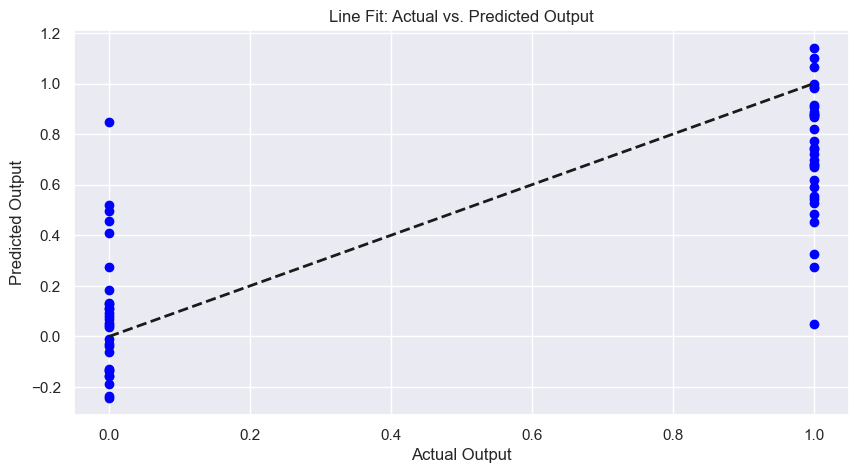

In [20]:
def plot_line_fit(model, X_test, y_test):
    """
    Plot the line fit of a trained linear regression model on the test data.

    Parameters:
    - model: Trained linear regression model.
    - X_test (array-like): Test features.
    - y_test (array-like): Test target.

    Returns:
    - None: Displays the plot.
    """
    # Predict on the test set
    y_pred = model.predict(X_test)

    # Plot the line fit
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Output')
    plt.ylabel('Predicted Output')
    plt.title('Line Fit: Actual vs. Predicted Output')
    plt.grid(True)
    plt.show()

# Plot the line fit
plot_line_fit(lin_reg_model, X_test, y_test)

The plot visually compares the actual output values with the predicted output values generated by the trained linear regression model. Ideally, all points should fall close to the diagonal dashed line, indicating a perfect match between actual and predicted values. In this plot, the closer the points are to the diagonal line, the better the model's predictions.

# CLustering:

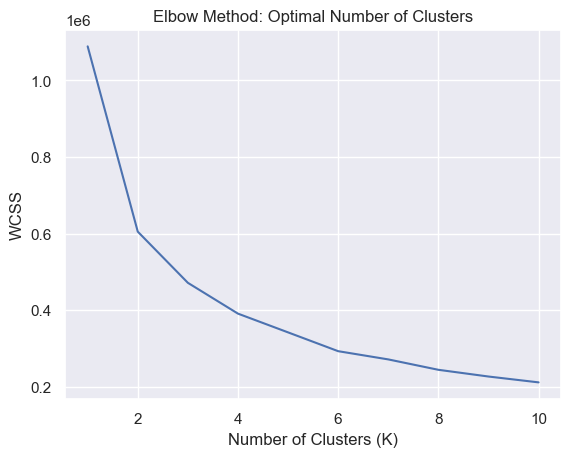

In [21]:
def plot_elbow_method(data, numerical_features):
    """
    Plot the within-cluster sum of squares (WCSS) against the number of clusters (K)
    to determine the optimal number of clusters using the elbow method.
    
    Parameters:
        data (DataFrame): Input dataset.
        numerical_features (list): List of numerical features to use for clustering.
    """
    # Prepare the feature matrix by selecting the numerical features from the dataset
    X = data[numerical_features]

    # Determine the optimal number of clusters using the elbow method
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plot the within-cluster sum of squares (WCSS) against the number of clusters (K)
    plt.plot(range(1, 11), wcss)
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS')
    plt.title('Elbow Method: Optimal Number of Clusters')
    plt.show()

plot_elbow_method(df, numerical_columns)

Based on the observation of the elbow method plot indicating two clusters as the optimal number, we can interpret the clustering result as dividing the dataset into two distinct groups based on the chosen numerical features. Each cluster represents a different segment or behavior within the data. 

In [22]:
def train_kmeans(X, n_clusters):
    """
    Train K-Means clustering model.
    
    Parameters:
        X (DataFrame): Input features.
        n_clusters (int): Number of clusters.
    
    Returns:
        kmeans: Trained K-Means model.
        labels (array): Predicted cluster labels.
        centroids (array): Cluster centroids.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    return kmeans, labels, centroids
    
kmeans, labels, centroids=train_kmeans(df[numerical_columns],2)

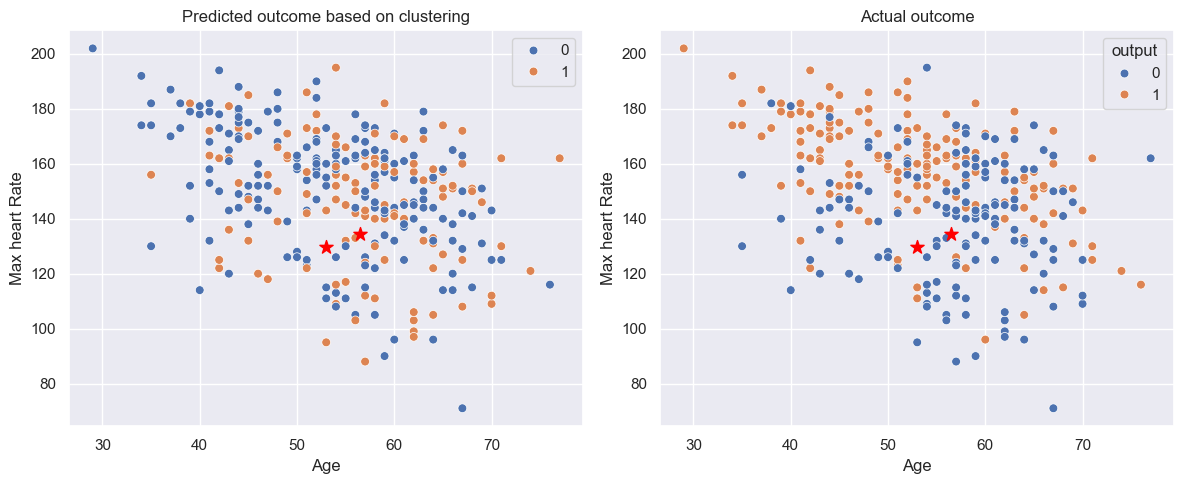

In [23]:
def plot_cluster_comparison(df, kmeans, centroids):
    """
    Plot a comparison between predicted outcomes based on clustering and actual outcomes.

    Parameters:
    - df (DataFrame): Input dataframe containing the data.
    - kmeans (KMeans): Fitted KMeans object.
    - centroids (array): Coordinates of the centroids of the clusters.

    Returns:
    - None: Displays the comparison plot.
    """
    
    plt.figure(figsize=(12, 5))
    
    # Plot predicted outcome based on clustering
    plt.subplot(1, 2, 1)
    sns.scatterplot(x="age", y="thalachh", data=df, hue=kmeans.labels_, s=40)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='*', label='Centroids')
    plt.title("Predicted outcome based on clustering")
    plt.xlabel("Age")
    plt.ylabel("Max heart Rate")
    
    # Plot actual outcome
    plt.subplot(1, 2, 2)
    sns.scatterplot(x="age", y="thalachh", data=df, hue=df["output"], s=40)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', marker='*', label='Centroids')
    plt.title("Actual outcome")
    plt.xlabel("Age")
    plt.ylabel("Max heart Rate")
    
    plt.tight_layout()
    plt.show()

plot_cluster_comparison(df, kmeans, centroids)

In the plot representing predicted outcomes, clusters are formed based on the features 'age' and 'thalachh' (maximum heart rate achieved), with centroids indicating the centers of these clusters. However, when comparing with the actual outcomes represented in the second plot, it's evident that while clustering captures certain trends, it may not fully align with the true classification based on the 'output' variable.